In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LogNorm

datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_BindSplitting/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1):
    #Defining our DoS parameter
    thing1 = np.add(np.divide(P1t0,Maxof0), np.divide(P2t0,Maxof0))
    thing2 = np.add(np.divide(P0t1,Maxof1),np.divide(P2t1,Maxof1))
    firstT = np.add(thing1,thing2)
    thing3 = 2*np.add(np.divide(LastProb0,Maxof0),np.divide(LastProb1,Maxof1))
    thing4 = np.add(np.divide(Maxof0,Maxof2),np.divide(Maxof1,Maxof2))
    thing4alt = (1/2)*abs(np.add(2,-thing4))
    thing5 = np.add(1,-np.divide(LastProb2,Maxof2))
    thing5add4 = np.add(thing5,thing4alt)
    lastT = np.add(thing5add4,thing3)
    DoS_ = (1/10)*(np.add(firstT,lastT))
    DoS = np.divide(1,DoS_)
    
    return DoS/2.2

## Plotting Dissociation rate rule

*reading, reshaping and defining data*

(19,)


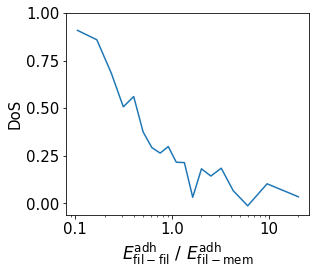

In [7]:
loc = datadir +'Data/BindSplit2_CharCrv'

n1 = 20

Maxof0_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [0])#.lstrip('(')#.rstrip(']')
Maxof0__ = np.zeros(n1)
for i in range(n1):
    Maxof0__[i] = Maxof0_[0][i].lstrip('(')
Maxof0 = Maxof0__
Maxof1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [1])
Maxof2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [2])
LastProb0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [3])
LastProb1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [4])
LastProb2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [5])
P1t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [6])
P2t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [7])
P0t1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [8])
P2t1_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [9])
P2t1__ = np.zeros(n1)
for j in range(n1):
    P2t1__[j] = P2t1_[9][j].rstrip(') ')
P2t1 = P2t1__.reshape(n1,1)
Maxof0 = Maxof0__.reshape(n1,1)


#DoS = DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1)
#print(np.shape(DoS))
#print(DoS)

fig,ax = plt.subplots(figsize = (4.5,4))

DoS = [0.662131,0.686000,0.645508,0.673400,0.714672,0.700270,0.713553,0.661235,0.724991,0.725636,0.754457,0.742440,0.752565,0.781405,0.846445,0.827519,0.889045,0.950763,0.968078,0.940943]
x1 = np.arange(20,0,-1)
x2 = np.arange(1,20.5,1)
x = np.divide(x1, x2)
DoS_list = list()
#ax.plot(x[0:19], (DoS[0:19]-0.65)/(1-0.65))
ax.plot(x[:19],(np.add(DoS[:19],-0.65))/(1-0.65))
print(np.shape(x[:19]))
ax.set_xscale("log")
plt.xlabel("$E^{\mathrm{adh}}_{\mathrm{fil-fil}}\ /\ E^{\mathrm{adh}}_{\mathrm{fil-mem}}$", fontsize = 17) 
plt.ylabel("DoS", fontsize = 15)  
plt.yticks([0,.25,.50,.75,1.00],size = 15)
plt.xticks([0.1,1,10],['0.1','1.0','10'],size = 15)
#print(
plt.gcf().subplots_adjust(left=0.15)
plt.gcf().subplots_adjust(bottom=0.18)
plt.show()
fname  = 'BindSplit.pdf'
fig.savefig(datadir+'Plots/'+fname)